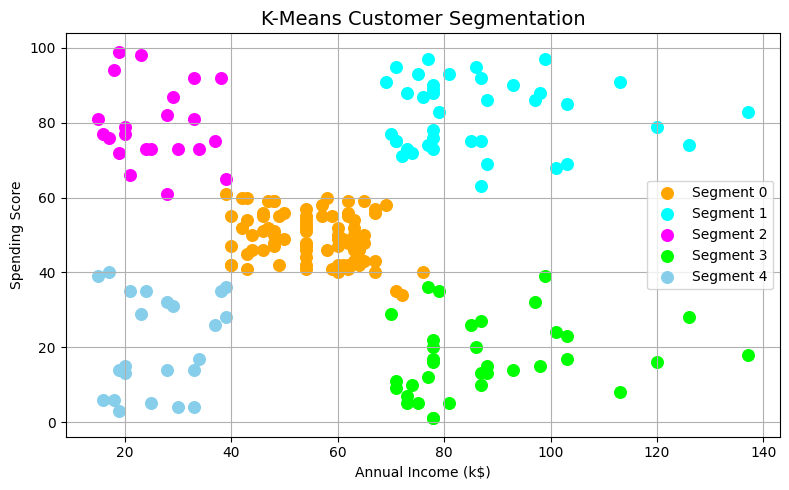


Segmented Customers Sample:
   CustomerID  Annual Income (k$)  Spending Score (1-100)  Segment
0           1                  15                      39        4
1           2                  15                      81        2
2           3                  16                       6        4
3           4                  16                      77        2
4           5                  17                      40        4


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("Mall_Customers.csv")

# Select relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans_model = KMeans(n_clusters=5, n_init=10, random_state=42)
data['Segment'] = kmeans_model.fit_predict(X_scaled)

# Visualization
plt.figure(figsize=(8, 5))
cluster_colors = ['orange', 'cyan', 'magenta', 'lime', 'skyblue']
for cluster_id in range(5):
    subset = data[data['Segment'] == cluster_id]
    plt.scatter(subset['Annual Income (k$)'],
                subset['Spending Score (1-100)'],
                s=70, c=cluster_colors[cluster_id], label=f'Segment {cluster_id}')

plt.title('K-Means Customer Segmentation', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display first few clustered results
print("\nSegmented Customers Sample:")
print(data[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Segment']].head())
